In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
retail=pd.read_csv("retail_data.csv",encoding='latin-1')

In [3]:
retail.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,09-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
retail['Dealer Name'].replace(['pearlson'],['Pearlson'],inplace=True)

In [5]:
retail['Dealer Name'].unique()

array(['Sunbird', 'Winfratech', 'Direct', 'Rajtechnis', 'Windoors',
       'OXXO', 'Pearlson', 'ITP'], dtype=object)

In [6]:
retail[retail['Allocation Status']=='Direct']['Allocation Status'].count()

64

In [7]:
retail_only_dealers=retail[retail['Allocation Status']=='Dealer']

In [8]:
retail_only_dealers.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Status Won Percentage of Dealers

In [9]:
retail_only_directs=retail_only_dealers.drop(retail_only_dealers[retail_only_dealers['Dealer Name']=='Direct']
                                             .index,inplace=True)

C:\Users\SHIVA\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
retail_only_dealers

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,April'16,12-Apr-16,EC12041647402,Dealer,Lost,TAMILNADU,VELLORE,635751,Renovation,6 to 10,...,NaN,NaN,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,April'16,14-Apr-16,EC13041647531,Dealer,Lost,TAMILNADU,CHENNAI,600006,Renovation,1 to 5,...,NaN,Budget Constraint,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,April'16,15-Apr-16,EC15041647749,Dealer,Lost,TAMILNADU,CHENNAI,600113,New Construction,6 to 10,...,NaN,Price Issue,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,April'16,15-Apr-16,EC15041647740,Dealer,Lost,TAMILNADU,CHENNAI,600107,New Construction,1 to 5,...,NaN,Price Issue,1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,April'16,17-Apr-16,EC17041647818,Dealer,Lost,TAMILNADU,CHENNAI,600041,New Construction,41 to 100,...,NaN,Price Issue,1141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def percent(x):
     return pd.Series(dict(total_count=x['Status'].count(),
                total_won_count=x[x['Status']=='Won']['Status'].count(),
                per=(x[x['Status']=='Won']['Status'].count()/x['Status'].count())*100
                          ))

percent(retail_only_dealers)

total_count        161.000000
total_won_count     26.000000
per                 16.149068
dtype: float64

In [12]:
percentage_won_wise=retail_only_dealers.groupby('Dealer Name').apply(percent)
percentage_won_wise

,total_count,total_won_count,per
Dealer Name,,,
ITP,13.0,0.0,0.000000
OXXO,20.0,4.0,20.000000
Pearlson,15.0,4.0,26.666667
Rajtechnis,15.0,1.0,6.666667
Sunbird,33.0,9.0,27.272727
Windoors,45.0,6.0,13.333333
Winfratech,20.0,2.0,10.000000


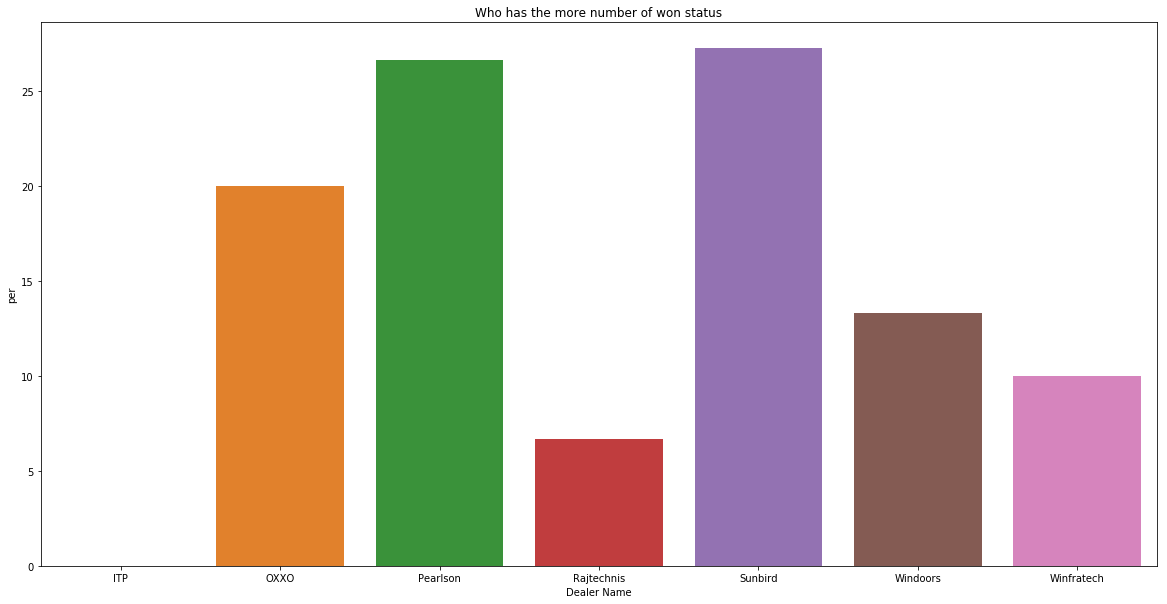

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x=percentage_won_wise.index,y='per' ,data=percentage_won_wise)
plt.title("Who has the more number of won status")
plt.show()

# Calculating the Performance of Dealers

### The performance of the dealer is calculated on the basis of order values if dealer has more order values then he is performing well else his performance is poor.

In [14]:
retail_only_dealers['Order Val. (Rs. Lac)'].isnull().value_counts()

True     137
False     24
Name: Order Val. (Rs. Lac), dtype: int64

In [15]:
retail_only_dealers['Order Val. (Rs. Lac)'].describe()

count    24.000000
mean      1.901667
std       2.559672
min       0.070000
25%       0.537500
50%       1.080000
75%       1.507500
max      10.950000
Name: Order Val. (Rs. Lac), dtype: float64

In [16]:
retail_only_dealers

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,April'16,12-Apr-16,EC12041647402,Dealer,Lost,TAMILNADU,VELLORE,635751,Renovation,6 to 10,...,NaN,NaN,826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,April'16,14-Apr-16,EC13041647531,Dealer,Lost,TAMILNADU,CHENNAI,600006,Renovation,1 to 5,...,NaN,Budget Constraint,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,April'16,15-Apr-16,EC15041647749,Dealer,Lost,TAMILNADU,CHENNAI,600113,New Construction,6 to 10,...,NaN,Price Issue,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,April'16,15-Apr-16,EC15041647740,Dealer,Lost,TAMILNADU,CHENNAI,600107,New Construction,1 to 5,...,NaN,Price Issue,1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,April'16,17-Apr-16,EC17041647818,Dealer,Lost,TAMILNADU,CHENNAI,600041,New Construction,41 to 100,...,NaN,Price Issue,1141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
order_null=retail_only_dealers[(retail_only_dealers['Status']=='Won') & (retail_only_dealers['Order Val. (Rs. Lac)'].isnull())]

In [18]:
order_null

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
20,April'16,22-Apr-16,EC21041648139,Dealer,Won,TAMILNADU,CHENNAI,600078,Renovation,6 to 10,...,NaN,NaN,948,Reduce Street Noise,0.0,1.0,0.0,0.0,0.0,0.0
144,Sept'16,21-Sep-16,EC21091659558,Dealer,Won,TAMILNADU,CHENNAI,600040,New Construction,21 to 40,...,NaN,NaN,1129,Reduce Street Noise & Low Maintenance,0.0,1.0,1.0,0.0,0.0,0.0


In [19]:
retail_orders=retail_only_dealers[(retail_only_dealers['Status']=='Won') & (retail_only_dealers['Order Val. (Rs. Lac)'].notnull())]

In [20]:
retail_orders['Order Val. (Rs. Lac)']

0       0.54
12      3.85
14      0.88
17      5.23
18      1.50
36      1.22
39      0.39
78      0.86
89     10.95
96      0.61
113     0.53
126     1.48
136     0.68
139     1.07
161     7.05
167     1.53
169     1.28
175     1.09
185     1.39
193     0.07
201     0.15
204     2.89
215     0.20
221     0.20
Name: Order Val. (Rs. Lac), dtype: float64

In [21]:
retail_orders['Order Val. (Rs. Lac)'].describe()

count    24.000000
mean      1.901667
std       2.559672
min       0.070000
25%       0.537500
50%       1.080000
75%       1.507500
max      10.950000
Name: Order Val. (Rs. Lac), dtype: float64

C:\Users\SHIVA\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


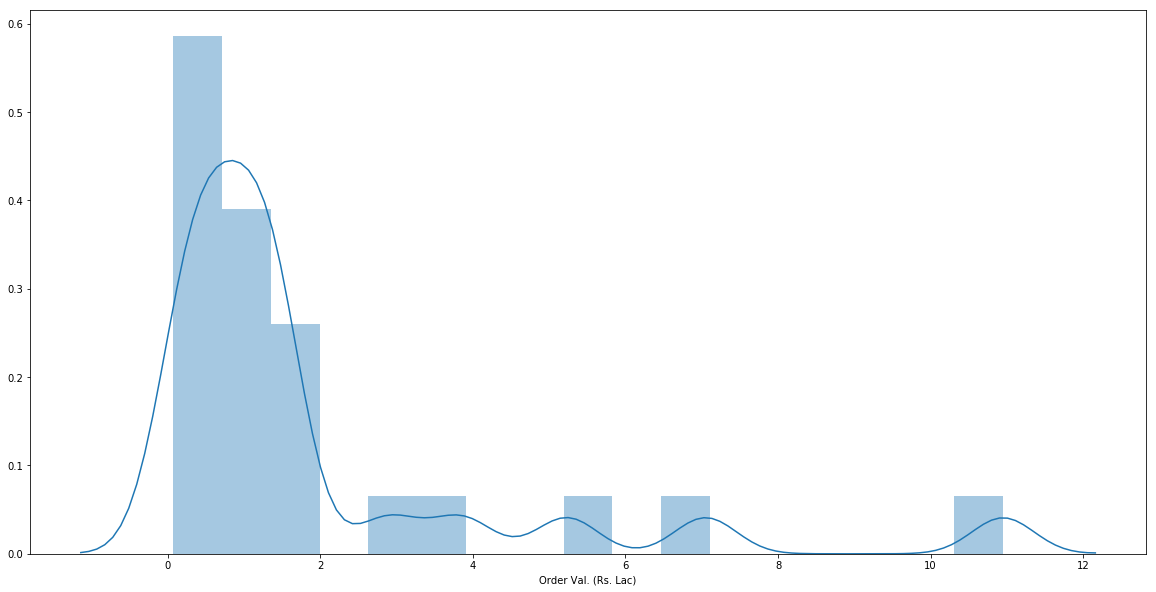

In [22]:
plt.figure(figsize=(20,10))

sns.distplot(retail_orders['Order Val. (Rs. Lac)'])

plt.show()

In [23]:
def tot_order(x):
    
    return pd.Series(dict(Total_value=x['Order Val. (Rs. Lac)'].sum()
                         ))

tot_order(retail_orders)

Total_value    45.64
dtype: float64

In [24]:
order_table=retail_orders.groupby('Dealer Name').apply(tot_order)
order_table

,Total_value
Dealer Name,
OXXO,7.39
Pearlson,13.77
Rajtechnis,0.53
Sunbird,10.30
Windoors,11.54
Winfratech,2.11


In [25]:
order_table.index

Index(['OXXO', 'Pearlson', 'Rajtechnis', 'Sunbird', 'Windoors', 'Winfratech'], dtype='object', name='Dealer Name')

## Setting the Treshold for Performance

# If the Order value of the dealers is less than the average then it performance is low

# if the order value of the dealer is more than the average then its performance is good

In [26]:
order_table.Total_value.describe()

count     6.000000
mean      7.606667
std       5.311334
min       0.530000
25%       3.430000
50%       8.845000
75%      11.230000
max      13.770000
Name: Total_value, dtype: float64

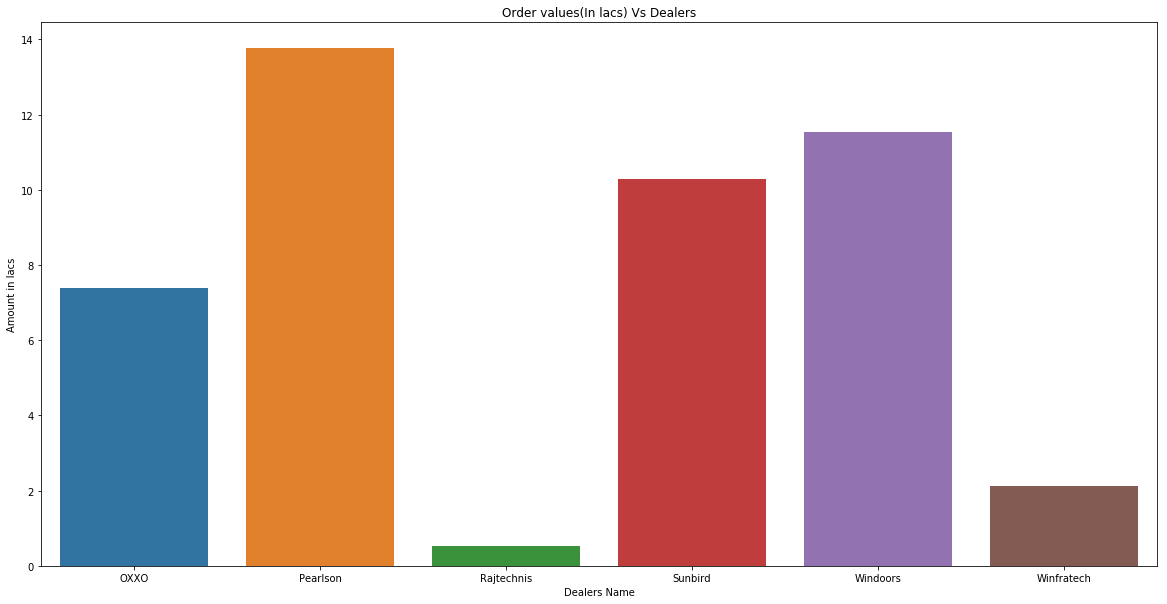

In [27]:
plt.figure(figsize=(20,10))
g=sns.barplot(x=order_table.index,y=order_table['Total_value'])
g.set(ylabel='Amount in lacs',xlabel='Dealers Name',title='Order values(In lacs) Vs Dealers')
plt.show()

# As per the analysis Pealson is having the highest order value and
# rajtechnis is having lowest of all order values

## Non Performers are who's order value is less than average value i.e.7.606

In [28]:
low_performer=order_table[order_table.Total_value<order_table.Total_value.mean()]
low_performer

,Total_value
Dealer Name,
OXXO,7.39
Rajtechnis,0.53
Winfratech,2.11


## Good Performers are who's order value is More than average value i.e.7.606

In [29]:
Good_performer=order_table[order_table.Total_value>order_table.Total_value.mean()]
Good_performer

,Total_value
Dealer Name,
Pearlson,13.77
Sunbird,10.30
Windoors,11.54


## Why this dealers are not performing well???

In [30]:
low_performer.index

Index(['OXXO', 'Rajtechnis', 'Winfratech'], dtype='object', name='Dealer Name')

In [31]:
retail_nonperformer_dealers=retail_only_dealers[retail_only_dealers['Dealer Name'].isin(low_performer.index)]
retail_nonperformer_dealers

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
1,April'16,08-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,April'16,11-Apr-16,EC11041647280,Dealer,Lost,TAMILNADU,CHENNAI,600056,Renovation,1 to 5,...,NaN,Price Issue,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,April'16,18-Apr-16,EC18041647862,Dealer,Lost,TAMILNADU,CHENNAI,600092,Renovation,1 to 5,...,NaN,Price Issue,1124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,April'16,21-Apr-16,EC21041648143,Dealer,Won,TAMILNADU,CHENNAI,600029,Renovation,21 to 40,...,NaN,NaN,1050,Reduce AC Energy Cost & Street Noise,0.0,1.0,0.0,0.0,0.0,1.0
18,April'16,21-Apr-16,EC21041648139,Dealer,Won,TAMILNADU,CHENNAI,600078,New Construction,6 to 10,...,NaN,NaN,1200,Reduce Street Noise,0.0,1.0,0.0,0.0,0.0,0.0
21,April'16,25-Apr-16,EC06101535268,Dealer,Lost,TAMILNADU,CHENNAI,600010,Renovation,6 to 10,...,NaN,Price Issue,934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,April'16,26-Apr-16,EC2002143733,Dealer,Lost,TAMILNADU,CHENNAI,600004,New Construction,1 to 5,...,NaN,Budget Constraint,1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,April'16,30-Apr-16,EC30041648800,Dealer,Lost,TAMILNADU,CHENNAI,600011,Renovation,1 to 5,...,NaN,Price Issue,1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,June'16,13-Jun-16,EC13061652002,Dealer,Lost,TAMILNADU,CHENNAI,600013,New Construction,6 to 10,...,NaN,NaN,1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,June'16,20-Jun-16,EC20061652592,Dealer,Lost,TAMILNADU,CHENNAI,600010,Renovation,1 to 5,...,NaN,Price Issue,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN


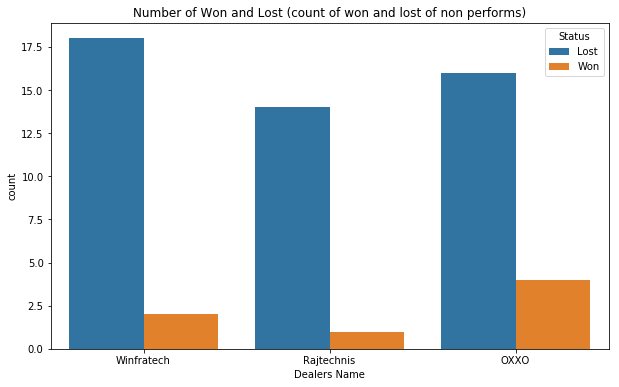

In [32]:
plt.figure(figsize=(10,6))
g=sns.countplot(x='Dealer Name', data=retail_nonperformer_dealers,hue='Status')
g.set(xlabel='Dealers Name',title='Number of Won and Lost (count of won and lost of non performs)')
plt.show()

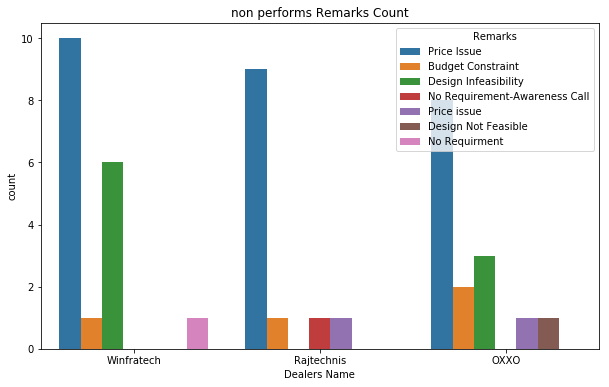

In [33]:
plt.figure(figsize=(10,6))
g=sns.countplot(x='Dealer Name', data=retail_nonperformer_dealers,hue='Remarks')
g.set(xlabel='Dealers Name',title='non performs Remarks Count')
plt.show()

# Non Performance is mainly because Overprice

## why there are not performing well??

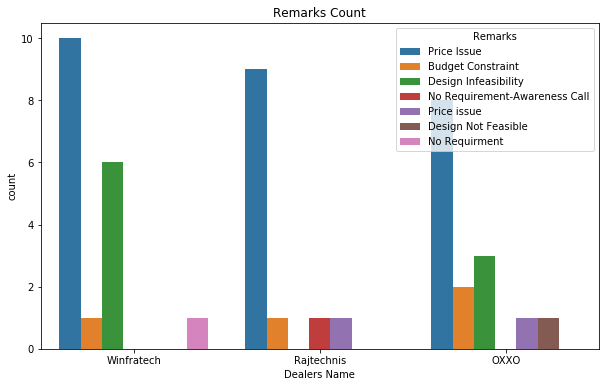

In [34]:
plt.figure(figsize=(10,6))
g=sns.countplot(x='Dealer Name', data=retail_nonperformer_dealers,hue='Remarks')
g.set(xlabel='Dealers Name',title='Remarks Count')
plt.show()

# Where There are not performing well

<Figure size 1440x720 with 0 Axes>

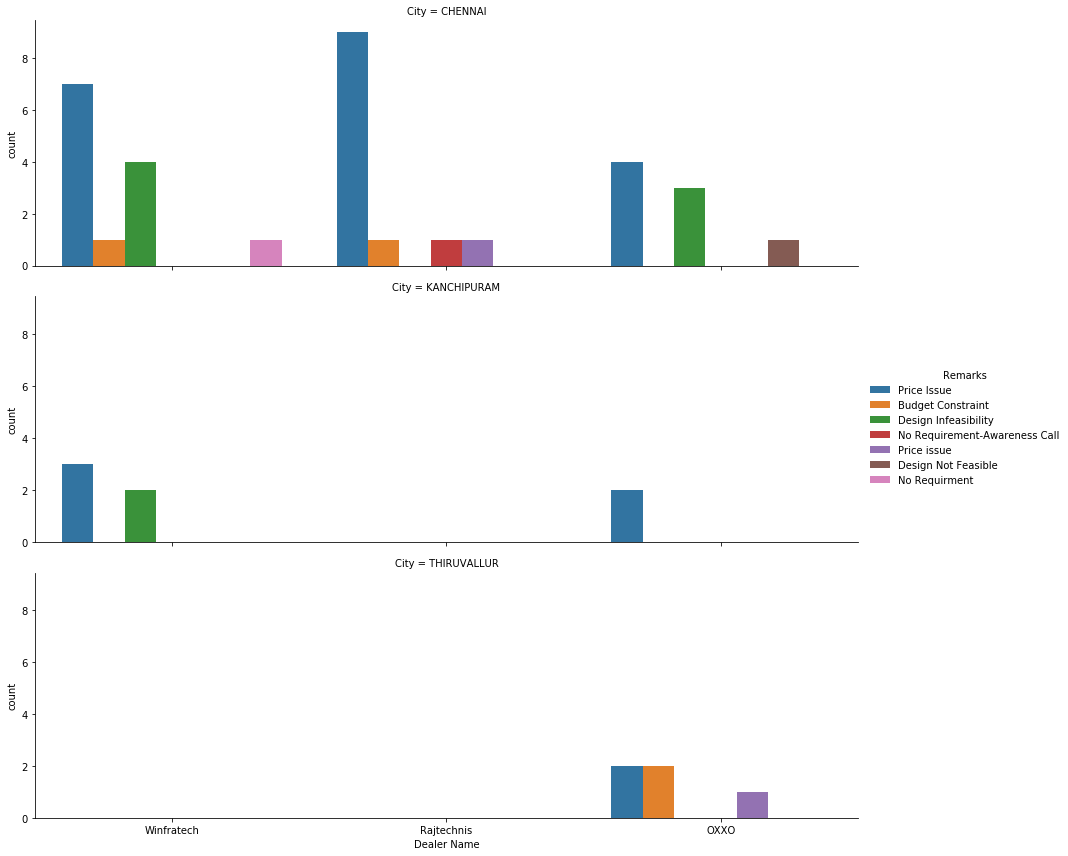

In [35]:
plt.figure(figsize=(20,10))
g = sns.catplot(x='Dealer Name', hue="Remarks", row="City",
                   data=retail_nonperformer_dealers, kind="count",
                   height=4, aspect=3);
plt.show()

# From above plot we can say that in chennai Dealers having the Price issue more and design feasibility issue also more

## In Chennai winfratech,OXXO,Rajtechnis Dealers are not performing well

## In THIRVALLUR  OXXO having some issues in performance

## in Kanchipuram Winfratech and OXXO


## Issues in cities for all dealers


<Figure size 1440x720 with 0 Axes>

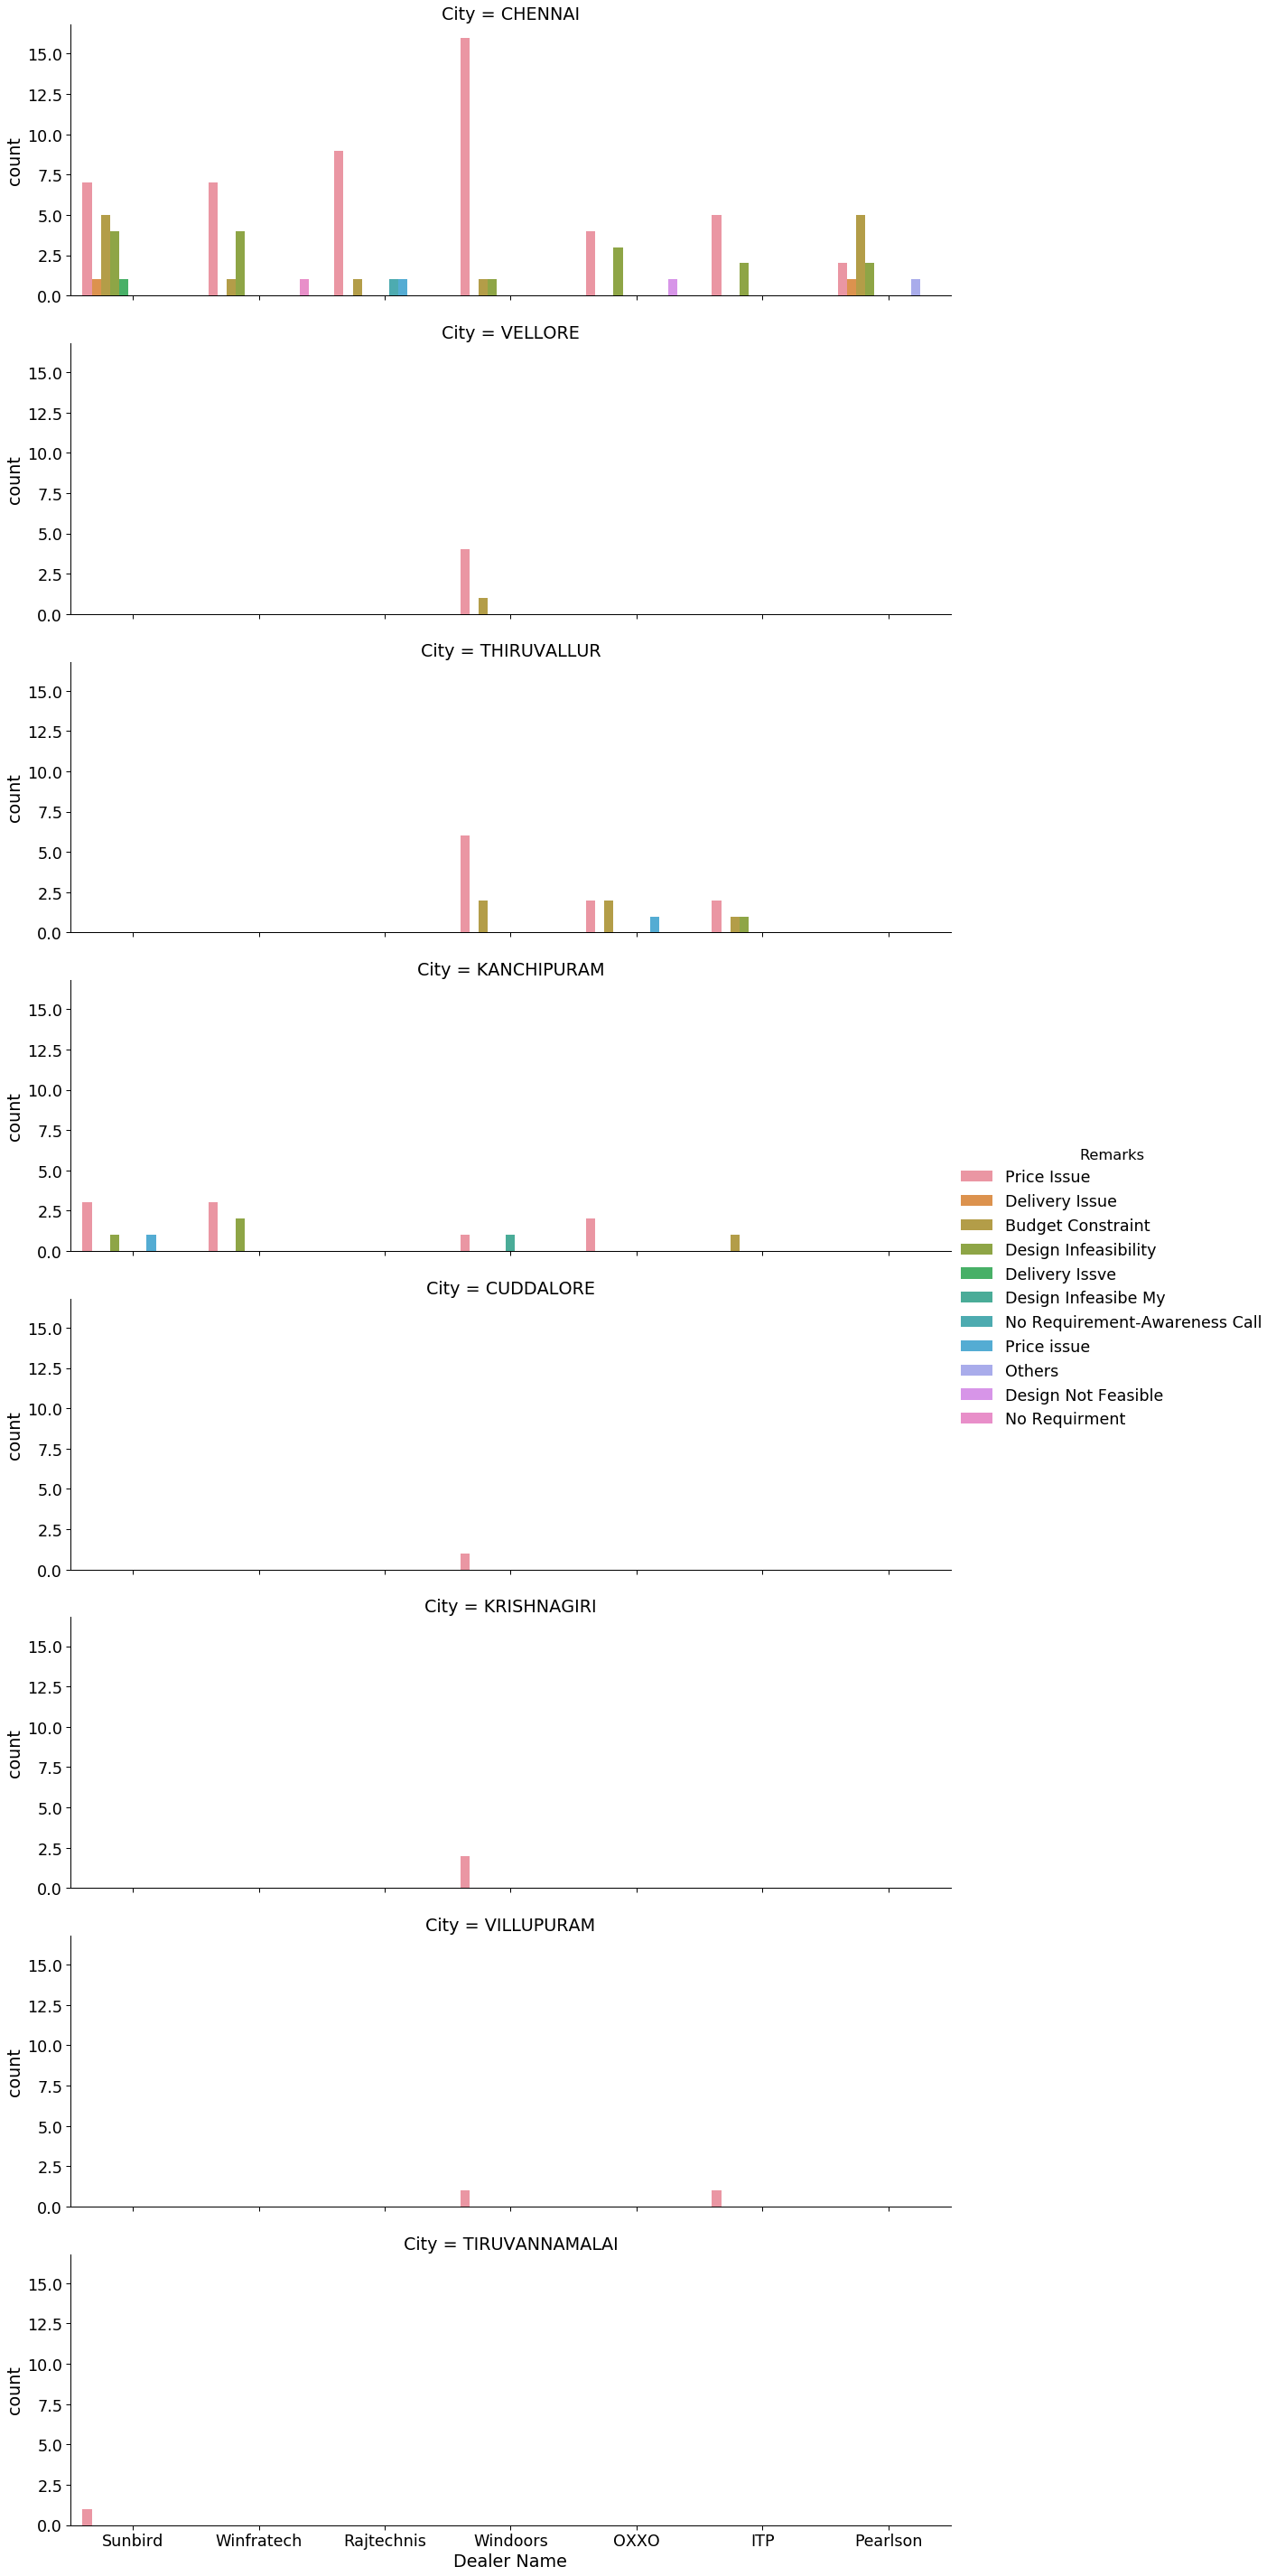

In [116]:
plt.figure(figsize=(20,10))
sns.set_context("paper",font_scale=2)
g = sns.catplot(x='Dealer Name', hue="Remarks", row="City",
                   data=retail_only_dealers, kind="count",
                   height=5, aspect=3);
plt.show()

# In Which City more lost are there

<Figure size 1440x720 with 0 Axes>

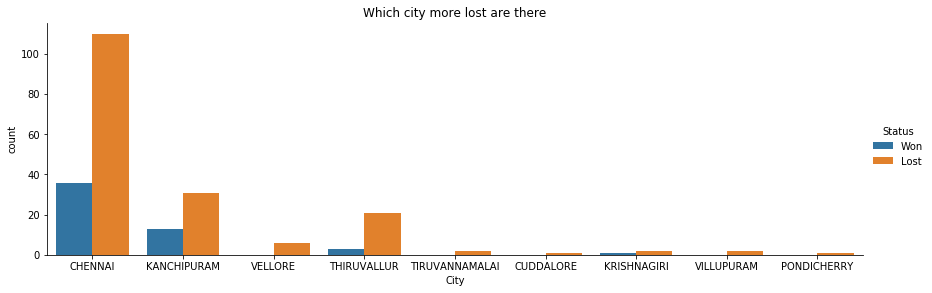

In [110]:
plt.figure(figsize=(20,10))
g = sns.catplot(x="City", hue="Status",
                   data=retail, kind="count",
                   height=4, aspect=3);
g.set(title='Which city more lost are there')
plt.show()

# Why There are not performing 

## Reason of performing with respect to project for all dealers'

<Figure size 1440x720 with 0 Axes>

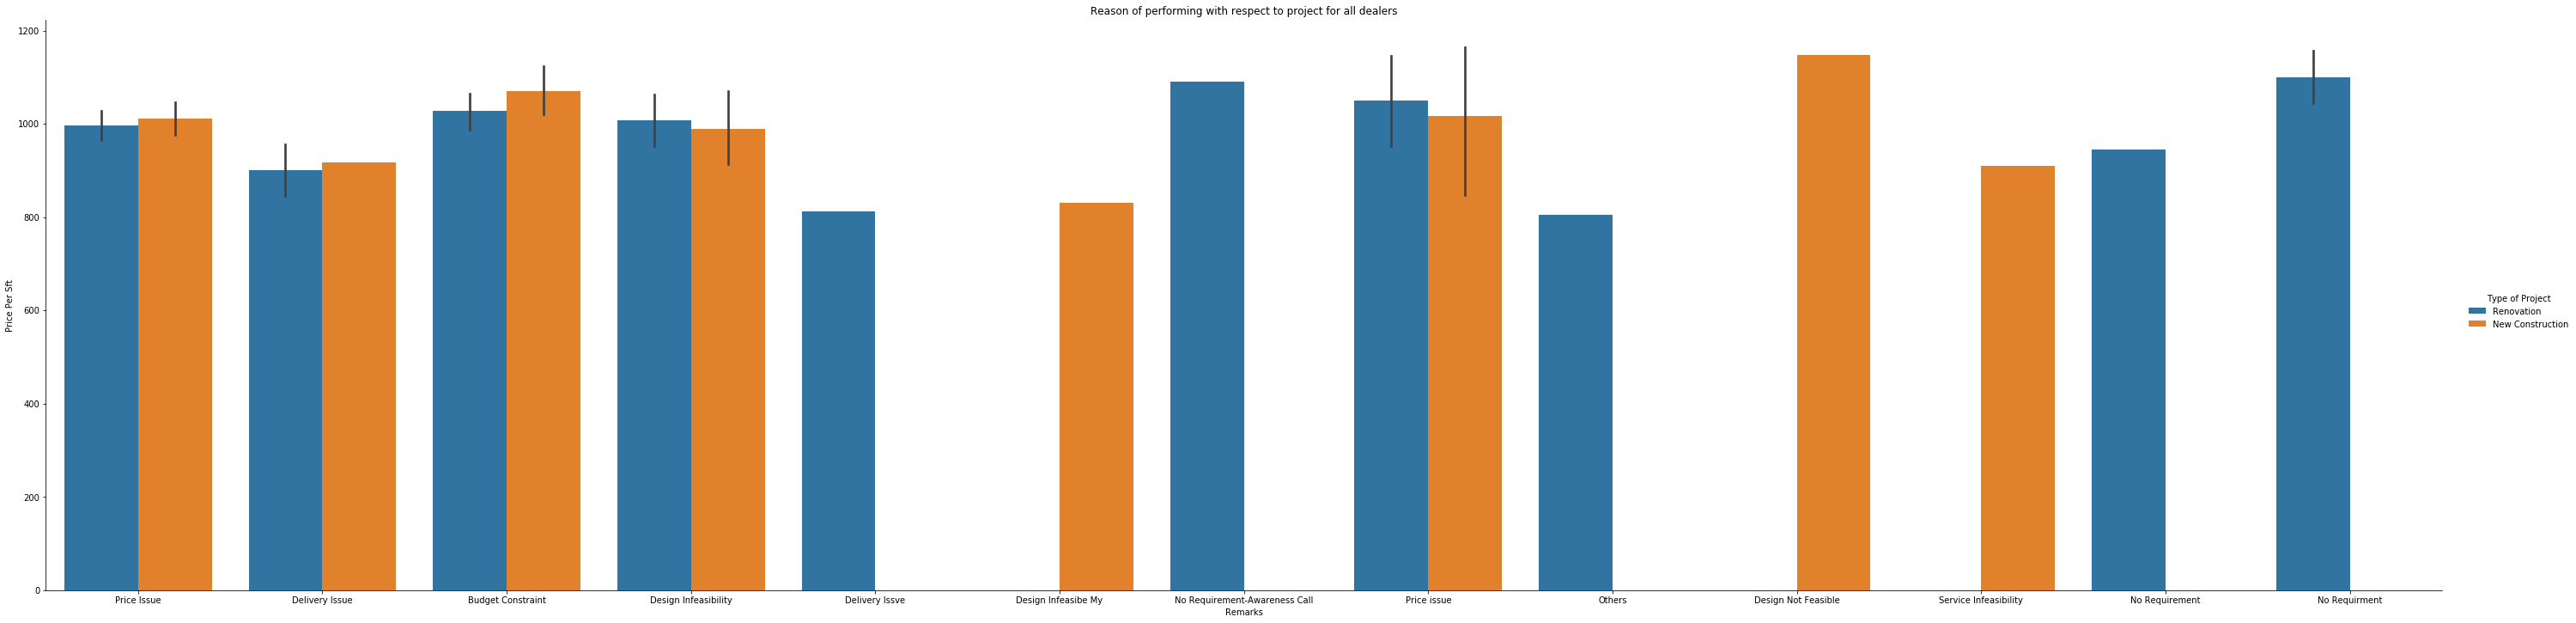

In [38]:
plt.figure(figsize=(20,10))
g = sns.catplot(x="Remarks",y='Price Per Sft',hue='Type of Project',
                   data=retail, kind="bar",height=10, aspect=4);

g.set(title='Reason of performing with respect to project for all dealers')

#plt.savefig('plot2')
plt.show()


<Figure size 1440x720 with 0 Axes>

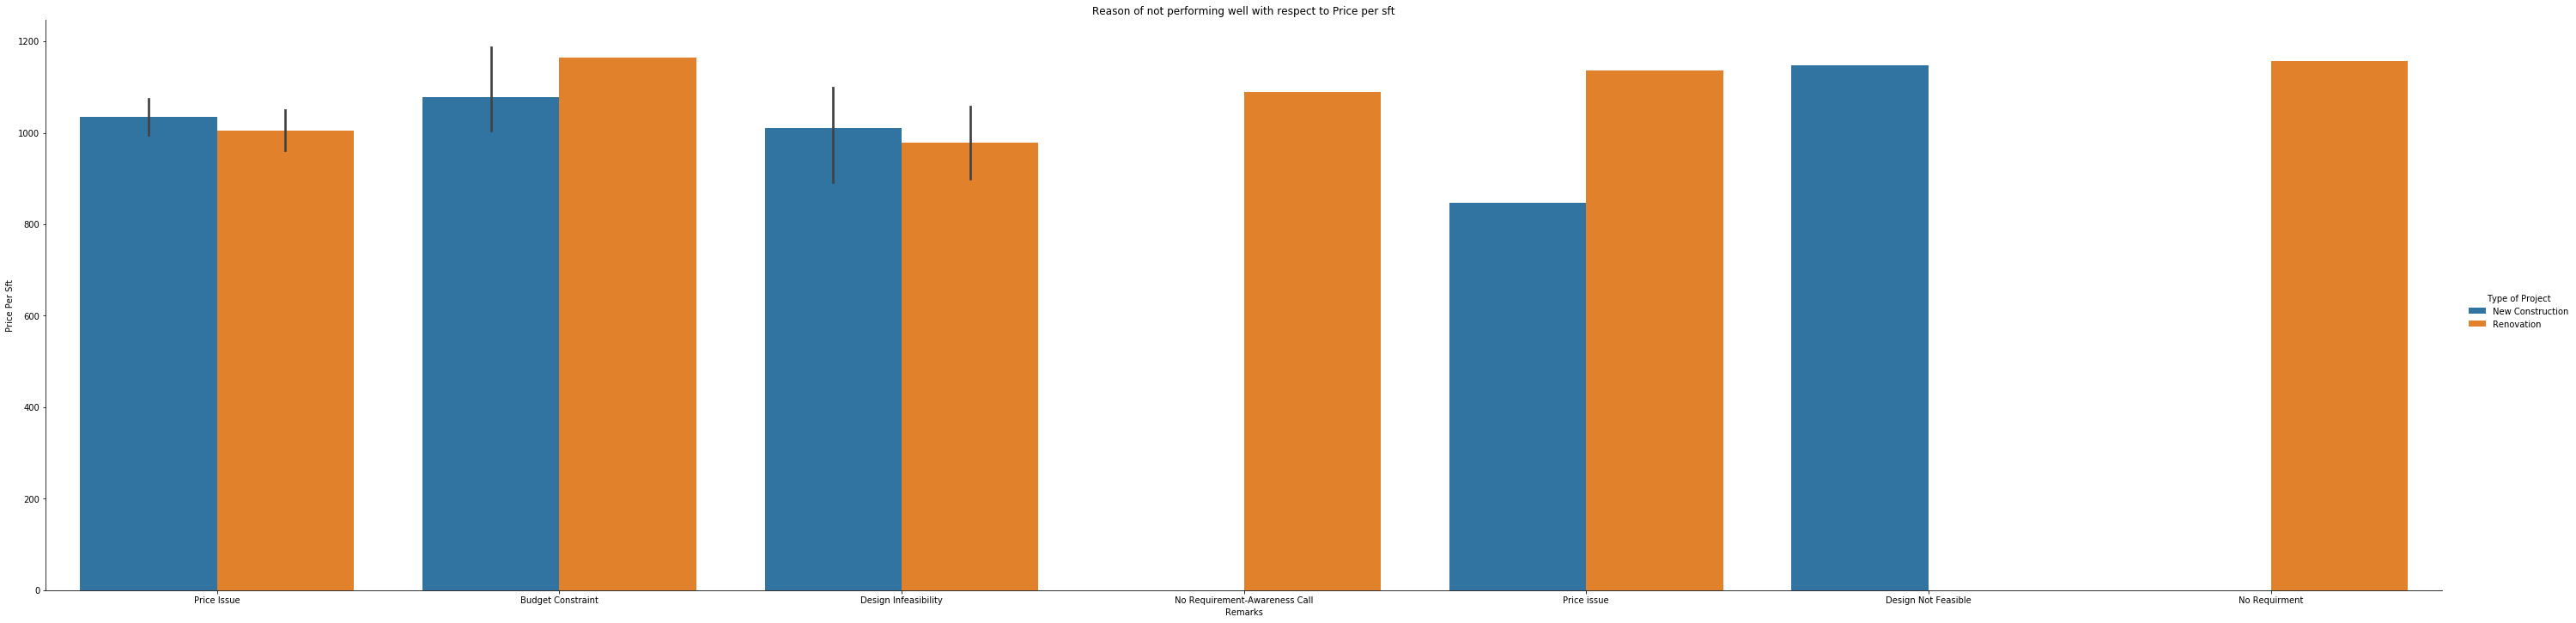

In [66]:
plt.figure(figsize=(20,10))
g = sns.catplot(x="Remarks",y='Price Per Sft',hue='Type of Project',
                   data=retail_nonperformer_dealers, kind="bar",height=10, aspect=4);

g.set(title='Reason of not performing well with respect to Price per sft')
#plt.savefig('plot2')
plt.show()

In [67]:
a=retail_only_dealers[' Order Recd\Lost '].unique()
a

array(['Order Received', 'Lost to Aluminum', 'Delivery Time Not Possible',
       'Lost to UPVC (Provide details)', 'Lost to Wooden',
       'Product Issue-Design/Type'], dtype=object)

In [68]:
a

array(['Order Received', 'Lost to Aluminum', 'Delivery Time Not Possible',
       'Lost to UPVC (Provide details)', 'Lost to Wooden',
       'Product Issue-Design/Type'], dtype=object)

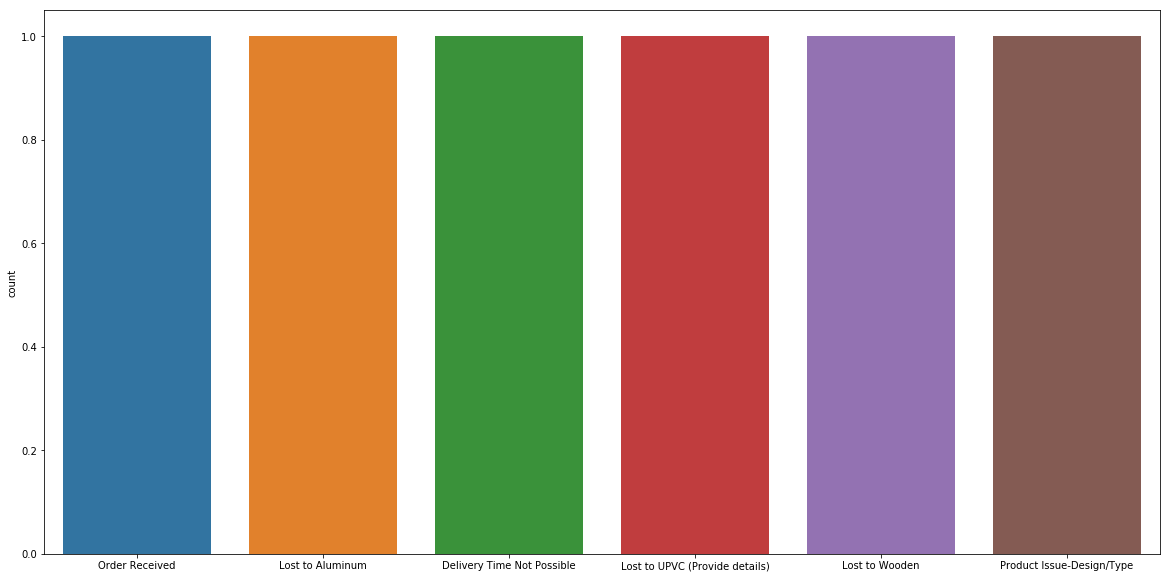

In [70]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=a,
                   data=retail_only_dealers);
#plt.savefig('plot2')
plt.show()

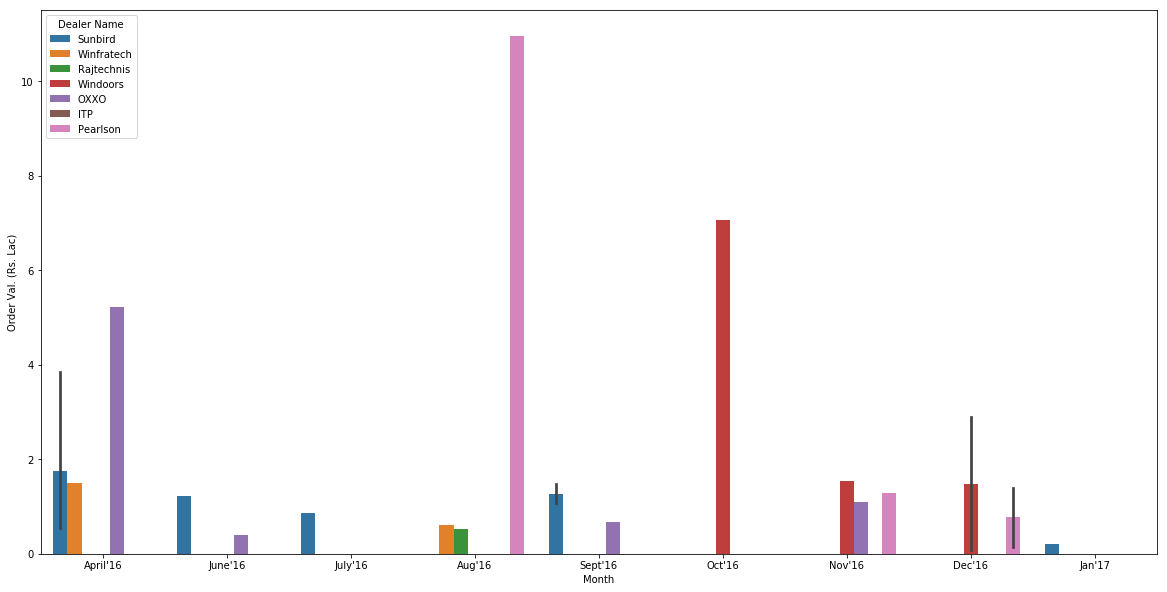

In [45]:
plt.figure(figsize=(20,10))
g=sns.barplot(x='Month',y="Order Val. (Rs. Lac)", data=retail_only_dealers,hue='Dealer Name')
#g.set(xlabel='Dealers Name',title='Number of Won and Lost (count of won and lost of non performs)')
plt.show()

plt.figure(figsize=(20,10))
sunbird=retail_only_dealers[retail_only_dealers["Dealer Name"]=="Sunbird"]
g=sns.barplot(x=sunbird["Dealer Name"],y="Order Val. (Rs. Lac)", data=retail_only_dealers,hue="Month")
#g.set(xlabel='Dealers Name',title='Number of Won and Lost (count of won and lost of non performs)')
plt.show()

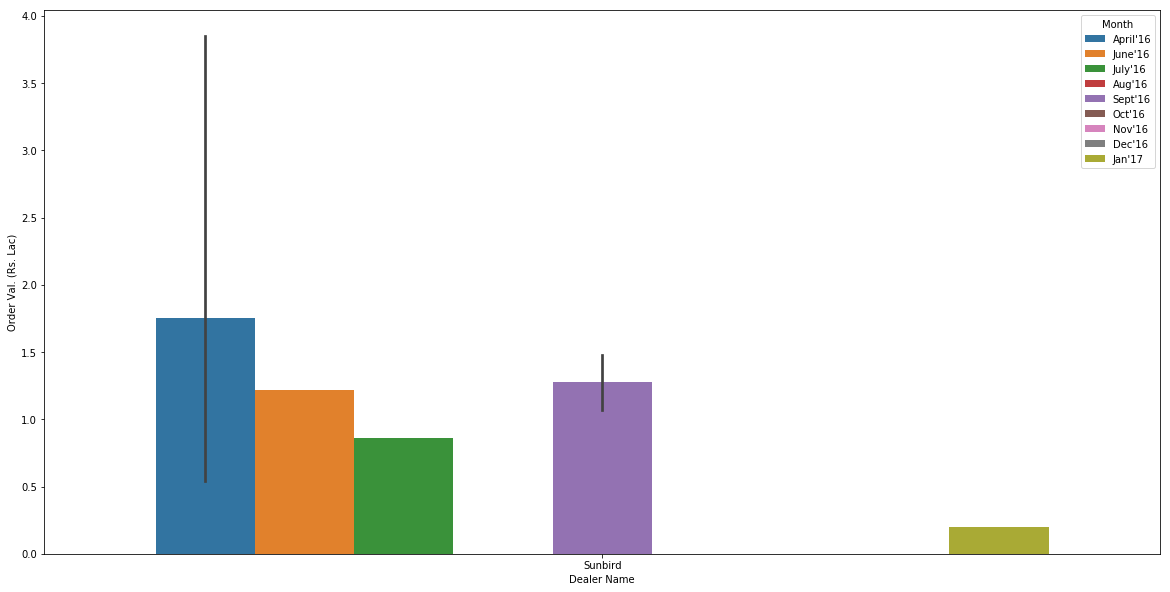

In [64]:
plt.figure(figsize=(20,10))
sunbird=retail_only_dealers[retail_only_dealers["Dealer Name"]=="Sunbird"]
g=sns.barplot(x=sunbird["Dealer Name"],y="Order Val. (Rs. Lac)", data=retail_only_dealers,hue="Month")
#g.set(xlabel='Dealers Name',title='Number of Won and Lost (count of won and lost of non performs)')
plt.show()

In [56]:
sunbird=retail_only_dealers[retail_only_dealers["Dealer Name"]=="Sunbird"]

In [57]:
sunbird

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,02-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
2,April'16,08-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,April'16,12-Apr-16,EC12041647460,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,11 to 20,...,NaN,Budget Constraint,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,April'16,14-Apr-16,EC13041647531,Dealer,Lost,TAMILNADU,CHENNAI,600006,Renovation,1 to 5,...,NaN,Budget Constraint,1089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,April'16,15-Apr-16,EC15041647749,Dealer,Lost,TAMILNADU,CHENNAI,600113,New Construction,6 to 10,...,NaN,Price Issue,921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,April'16,17-Apr-16,EC17041647818,Dealer,Lost,TAMILNADU,CHENNAI,600041,New Construction,41 to 100,...,NaN,Price Issue,1141,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,April'16,17-Apr-16,EC17041647824,Dealer,Won,TAMILNADU,CHENNAI,600028,New Construction,1 to 5,...,NaN,NaN,1450,Nil,NaN,NaN,NaN,NaN,NaN,NaN
14,April'16,18-Apr-16,EC18041647914,Dealer,Won,TAMILNADU,CHENNAI,600020,New Construction,6 to 10,...,NaN,NaN,1293,Reduce AC Energy Cost & Street Noise,0.0,1.0,0.0,0.0,0.0,1.0
15,April'16,19-Apr-16,EC19041648005,Dealer,Lost,TAMILNADU,CHENNAI,600086,Renovation,1 to 5,...,NaN,Budget Constraint,892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,April'16,20-Apr-16,EC20041648053,Dealer,Lost,TAMILNADU,CHENNAI,600008,Renovation,1 to 5,...,NaN,Price Issue,821,NaN,NaN,NaN,NaN,NaN,NaN,NaN


plt.figure(figsize=(20,10))
g = sns.catplot(x=order_rec_lost,y='Month',hue="Dealer Name",
                   data=retail_only_dealers, kind="bar",height=10, aspect=4);

g.set(title='Reason of not performing well with respect to Price per sft')
#plt.savefig('plot2')
plt.show()


In [71]:
retail_only_dealers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 227
Data columns (total 40 columns):
Month                                        161 non-null object
Enquiry Date                                 161 non-null object
Enquiry Id                                   161 non-null object
Allocation Status                            161 non-null object
Status                                       161 non-null object
State                                        161 non-null object
City                                         161 non-null object
Pincode                                      161 non-null int64
Type of Project                              161 non-null object
No of Windows                                161 non-null object
Source                                       161 non-null object
Zone                                         161 non-null object
Dealer Name                                  161 non-null object
First Action-Call made                       161 no

In [92]:
order_rec_lost=retail_only_dealers[" Order Recd\Lost "]

In [104]:
order_rec_lost.values

array(['Order Received', 'Lost to Aluminum', 'Delivery Time Not Possible',
       'Lost to UPVC (Provide details)', 'Lost to Wooden',
       'Lost to Wooden', 'Lost to UPVC (Provide details)',
       'Lost to Wooden', 'Lost to UPVC (Provide details)',
       'Lost to Wooden', 'Order Received', 'Lost to Aluminum',
       'Order Received', 'Lost to UPVC (Provide details)',
       'Lost to UPVC (Provide details)', 'Order Received',
       'Order Received', 'Product Issue-Design/Type', 'Order Received',
       'Lost to UPVC (Provide details)', 'Delivery Time Not Possible',
       'Lost to UPVC (Provide details)', 'Product Issue-Design/Type',
       'Lost to UPVC (Provide details)', 'Lost to UPVC (Provide details)',
       'Lost to UPVC (Provide details)', 'Lost to UPVC (Provide details)',
       'Lost to UPVC (Provide details)', 'Lost to UPVC (Provide details)',
       'Lost to Aluminum', 'Lost to UPVC (Provide details)',
       'Lost to UPVC (Provide details)', 'Order Received',
       'L

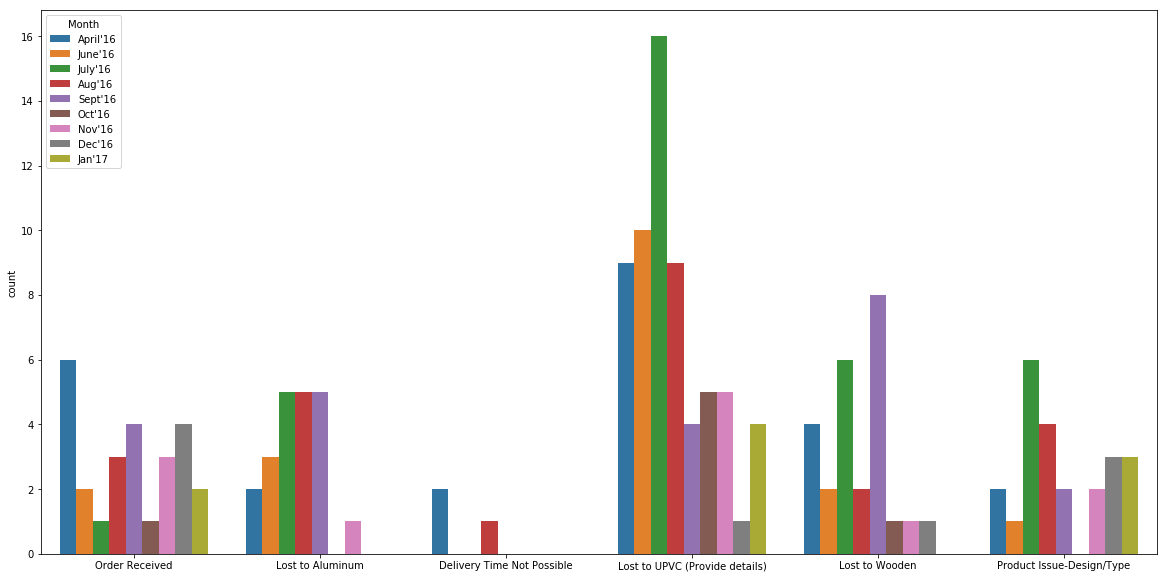

In [108]:
plt.figure(figsize=(20,10))
g = sns.countplot(x=order_rec_lost.values,hue="Month",
                   data=retail_only_dealers);

#g.set(title='Reason of not performing well with respect to Price per sft')
#plt.savefig('plot2')
plt.show()
